In [1]:
# DON'T FORGET TO ACTIVATE THE GPU when on google colab (Edit > Notebook settings)

from os import environ
GOOGLE_COLAB = True if "COLAB_GPU" in environ else False
if GOOGLE_COLAB:
    !pip install swyft

In [2]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(26)
torch.manual_seed(26)

In [3]:
DEVICE = swyft.set_device(gpu=True)
MAX_EPOCHS = 10
EXPECTED_N = 4000

In [4]:
def simulator(z):
    return np.array([z[0],2*(z[1]-z[0])])

def noise(x, z = None, noise=0.01):
    n = np.random.randn(*x.shape)*noise
    return x + n

z0 = np.array([0.55,0.45])
zdim = len(z0)
x0 = simulator(z0)  # Using Asimov data

In [5]:
points, re = swyft.run(
    x0, 
    simulator, 
    zdim = 2, 
    noise = noise, 
    device = DEVICE, 
    n_train = 10000, 
    n_rounds = 2,
    early_stopping_patience = 2
)

Simulate:   2%|▏         | 243/9943 [00:00<00:04, 2424.95it/s]

Creating new cache.
Adding 9943 new samples. Run simulator!


Simulate: 100%|██████████| 9943/9943 [00:03<00:00, 3011.67it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 91.68802943825722
Validation loss: 71.33912439644337
Validation loss: 70.28981804847717
Validation loss: 65.43176284432411
Validation loss: 66.29737147688866
Validation loss: 65.59209308028221
Total epochs: 6
LR iteration 1
Validation loss: 57.9390599578619
Validation loss: 60.51750893890858
Validation loss: 59.89190638065338
Total epochs: 3


Simulate:   3%|▎         | 309/9764 [00:00<00:03, 3083.80it/s]

Constrained posterior area: 0.022395286419906915
Adding 9764 new samples. Run simulator!


Simulate: 100%|██████████| 9764/9764 [00:03<00:00, 3041.87it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 235.08098554611206
Validation loss: 227.54250192642212
Validation loss: 187.12005400657654
Validation loss: 197.5580017566681
Validation loss: 181.86368203163147
Validation loss: 189.73468542099
Validation loss: 174.36763381958008
Validation loss: 185.18510568141937
Validation loss: 175.0541912317276
Total epochs: 9
LR iteration 1
Validation loss: 173.87132000923157
Validation loss: 167.838073015213
Validation loss: 167.1415135860443
Validation loss: 166.0863332748413
Validation loss: 174.89746701717377
Validation loss: 166.8480930328369
Total epochs: 6


Simulate:  16%|█▌        | 312/1985 [00:00<00:00, 3110.89it/s]

Constrained posterior area: 0.01804275417736799
Adding 1985 new samples. Run simulator!


Simulate: 100%|██████████| 1985/1985 [00:00<00:00, 3035.23it/s]


yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.
LR iteration 0
Validation loss: 251.37866973876953
Validation loss: 200.01302886009216
Validation loss: 202.03553700447083
Validation loss: 183.45957279205322
Validation loss: 178.92414700984955
Validation loss: 185.2461187839508
Validation loss: 183.89794218540192
Total epochs: 7
LR iteration 1
Validation loss: 169.79520392417908
Validation loss: 170.85531270503998
Validation loss: 171.95625376701355
Total epochs: 3


Simulate: 100%|██████████| 2/2 [00:00<00:00, 1433.95it/s]

Constrained posterior area: 0.018037247322615836
Adding 2 new samples. Run simulator!
yshape (shape of features between head and legs): 2
Start training
No new simulator runs required.


LR iteration 0
Validation loss: 238.98738431930542
Validation loss: 233.371910572052
Validation loss: 195.350217461586
Validation loss: 188.38414335250854
Validation loss: 196.75604557991028
Validation loss: 193.37307405471802
Total epochs: 6
LR iteration 1
Validation loss: 186.05990195274353
Validation loss: 182.85517489910126
Validation loss: 183.4041829109192
Validation loss: 183.40428161621094
Total epochs: 4


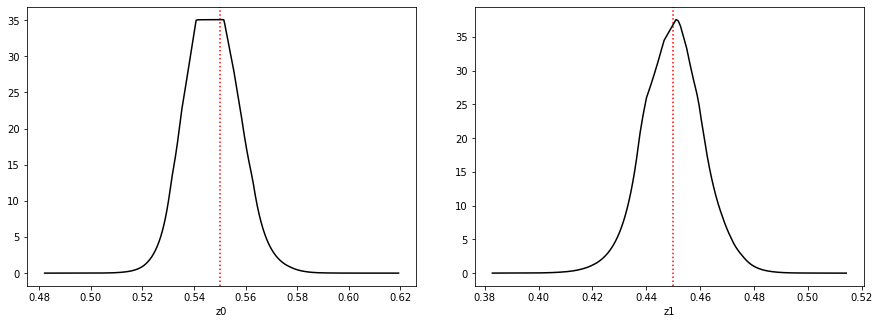

In [6]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys',max_n_points=10000)

In [7]:
re2 = swyft.RatioEstimator(points, combinations = [[0, 1]], device=DEVICE)
re2.train(
    max_epochs=MAX_EPOCHS, 
    batch_size=32, 
    lr_schedule=[1e-3, 1e-4],
    early_stopping_patience=2,
)

yshape (shape of features between head and legs): 2
Start training
LR iteration 0
Validation loss: 28.330765023827553
Validation loss: 21.42188984155655
Validation loss: 19.58207204937935
Validation loss: 21.513894364237785
Validation loss: 16.250517815351486
Validation loss: 17.06524609774351
Validation loss: 18.97914555668831
Total epochs: 7
LR iteration 1
Validation loss: 14.870626389980316
Validation loss: 16.09268783032894
Validation loss: 14.798786327242851
Validation loss: 15.023862287402153
Validation loss: 15.333966322243214
Total epochs: 5


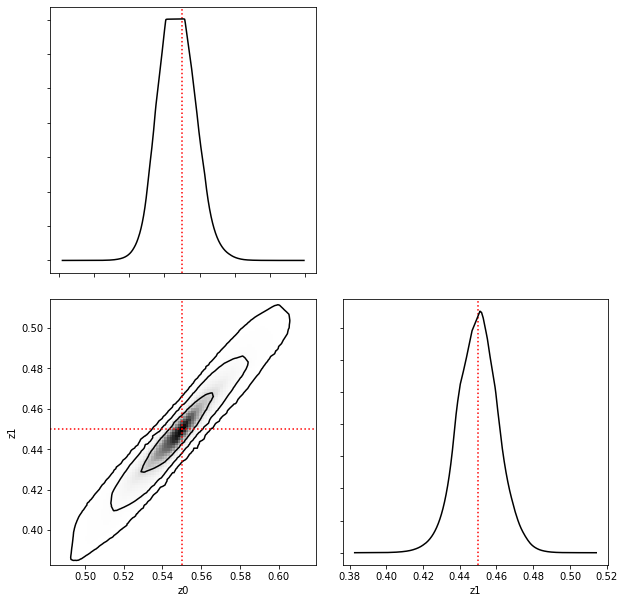

In [8]:
swyft.corner(re, re2, x0 = x0, z0 = z0, cmap = 'Greys', dim = 10, max_n_points = 10000)